# Assignment 3
# Introduction to Python for Data Science Kampus Merdeka
***
**Nama : Tasya Fathia Putriansyah**

**Kode Peserta : PYTN-KS07-018**

## Project Overview
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1. `bank-additional-full.csv` with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. `bank-additional.csv` with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. `bank-full.csv` with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. `bank.csv` with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input variables:

**# bank client data:**
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7. loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

**# related with the last contact of the current campaign:**

8. contact: contact communication type (categorical: 'cellular', 'telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**# other attributes:**

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')
**# social and economic context attributes**

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21. y - has the client subscribed a term deposit? (binary: 'yes', 'no')

# Import Library

Pertama-tama kita import semua modul yang akan digunakan untuk menganalisis dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

Numpy NumPy (Python Numerik) adalah ekstensi open source dari Python Numerical komputasi. Alat ini dapat digunakan untuk menyimpan dan memproses matriks besar. Numpy jauh lebih efisien daripada struktur nested list Python sendiri. NumPy mendukung operasi array dan matriks beberapa dimensi. Selain itu juga menyediakan sejumlah besar perpustakaan matematika untuk operasi array Dan digunakan di hampir setiap bidang sains dan teknik.

Pandas Pandas adalah tools analisis dan manipulasi data open source yang cepat, powerful, fleksibel, dan mudah digunakan, pandas dibuat pemrograman Python. Pandas menawarkan struktur data dan banyak operasi untuk memanipulasi data. Pandas memungkinkan banyak operasi manipulasi data seperti penggabungan, pembentukan kembali, pembersihan dan fitur perselisihan data.

Matplotlib Matplotlib adalah suatu library atau package yang paling populer di bahasa python untuk melakukan visualisasi data seperti membuat plot grafik untuk satu sumbu atau lebih. Setiap sumbu memiliki sumbu horizontal (x) dan sumbu vertikal (y).Salah satu aspek inti Matplotlib adalah matplotlib.pyplot. matplotlib.pyplot adalah kumpulan fungsi gaya perintah yang membuat Matplotlib berfungsi seperti MATLAB. Setiap fungsi pyplot membuat beberapa perubahan pada gambar: misalnya, membuat gambar, membuat area plot dalam gambar, membuat plot beberapa garis di area plotting, menghiasi plot dengan label, dll.

Scikit-learn Scikit-learn atau sklearn merupakan sebuah module dari bahasa pemrograman Python yang dibangun berdasarkan NumPy, SciPy, dan Matplotlib. Fungsi dari module ini adalah untuk membantu melakukan processing data ataupun melakukan training data untuk kebutuhan machine learning atau data science.

Seaborn Seaborn adalah library untuk visualisasi data yang dibangun di atas matplotlib. Seaborn memiliki lebih banyak fungsi untuk visualisasi data dan lebih mudah digunakan.

# Import Dataset

Selanjutnya kita import dataset yang telah di download di link = https://archive.ics.uci.edu/ml/datasets/Bank+Marketing# Untuk data train menggunakan dataset full sedangkan data test menggunakan 10% dari dataset full.

In [2]:
pd.set_option("display.max.columns", None) # untuk menampilkan semua kolom pada dataset

In [3]:
df = pd.read_csv('dataset/bank-full.csv', delimiter=';')

# Exploring Dataset

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.shape

(45211, 17)

**Keterangan**

dari penggunaan .shape() dapat diketahui bahwa data yang dimiliki terdiri dari 45.211 banyak baris data dan 17 banyak kolom data.

# Data Preprocessing

## Mengganti nama kolom

In [8]:
df_new = df.rename(columns={"y":"deposit"})

In [9]:
# Cek Data
df_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


**Keterangan**

Pada dataframe diatas dapat dilihat bahwa, kolom y telah berubah menjadi deposit, sesuai dengan desired target yang diinginkan.

## Cek Duplikasi dan Nilai Null

In [10]:
df.duplicated().sum()

0

In [11]:
df.duplicated().any()

False

In [12]:
df.isnull().sum() #mengecek missing values berupa nilai NA pada dataset

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Keterangan**

Diketahui bahwa didalam dataset tidak ada duplikais dan tidak ada yang bernilai null.

In [13]:
df_bank = df_new.copy()

In [14]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Keterangan**

Mengambil data dengan tipe data int, yaitu:

- age
- balance
- day
- campaign
- pdays
- previous

dan melakukan standarisasi data

**Notes**

duration tidak diikutsertakan dalam proses standarisasi data, karena data yang ada pada kolom duration sangat berdampak sekali dengan hasil output nantinya

In [15]:
scaler = StandardScaler()

data_num = [
    "age",
    "balance",
    "day",
    "campaign",
    "pdays",
    "previous"
]

df_bank[data_num] = scaler.fit_transform(df_bank[data_num])

In [16]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.606965,management,married,tertiary,no,0.256419,yes,no,unknown,-1.298476,may,261,-0.569351,-0.411453,-0.25194,unknown,no
1,0.288529,technician,single,secondary,no,-0.437895,yes,no,unknown,-1.298476,may,151,-0.569351,-0.411453,-0.25194,unknown,no
2,-0.747384,entrepreneur,married,secondary,no,-0.446762,yes,yes,unknown,-1.298476,may,76,-0.569351,-0.411453,-0.25194,unknown,no
3,0.571051,blue-collar,married,unknown,no,0.047205,yes,no,unknown,-1.298476,may,92,-0.569351,-0.411453,-0.25194,unknown,no
4,-0.747384,unknown,single,unknown,no,-0.447091,no,no,unknown,-1.298476,may,198,-0.569351,-0.411453,-0.25194,unknown,no


**Keterangan**

.fit_transform() menyesuaikan instance StandardScaler ke array yang diteruskan sebagai argumen, mengubah array dan mengembalikan array standar yang baru.

In [17]:
df_bank[data_num].describe()

,age,balance,day,campaign,pdays,previous
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,5.222844e-16,3.070663e-15,-9.219436e-15,1.254699e-14,-1.395817e-13,1.355210e-13
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.159994e+00,-3.081149e+00,-1.779108e+00,-5.693506e-01,-4.114531e-01,-2.519404e-01
25%,-7.473845e-01,-4.237719e-01,-9.380027e-01,-5.693506e-01,-4.114531e-01,-2.519404e-01
50%,-1.823406e-01,-3.002800e-01,2.326031e-02,-2.465603e-01,-4.114531e-01,-2.519404e-01
75%,6.652252e-01,2.158743e-02,6.240497e-01,7.622994e-02,-4.114531e-01,-2.519404e-01
max,5.091402e+00,3.309478e+01,1.825628e+00,1.944365e+01,8.297431e+00,1.191360e+02


In [18]:
df_bank[data_num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,5.222844e-16,1.000011,-2.159994,-0.747384,-0.182341,0.665225,5.091402
balance,45211.0,3.070663e-15,1.000011,-3.081149,-0.423772,-0.300280,0.021587,33.094776
day,45211.0,-9.219436e-15,1.000011,-1.779108,-0.938003,0.023260,0.624050,1.825628
campaign,45211.0,1.254699e-14,1.000011,-0.569351,-0.569351,-0.246560,0.076230,19.443647
pdays,45211.0,-1.395817e-13,1.000011,-0.411453,-0.411453,-0.411453,-0.411453,8.297431
previous,45211.0,1.355210e-13,1.000011,-0.251940,-0.251940,-0.251940,-0.251940,119.135982


In [19]:
df_bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


# Exploratory Data Analysis (EDA)

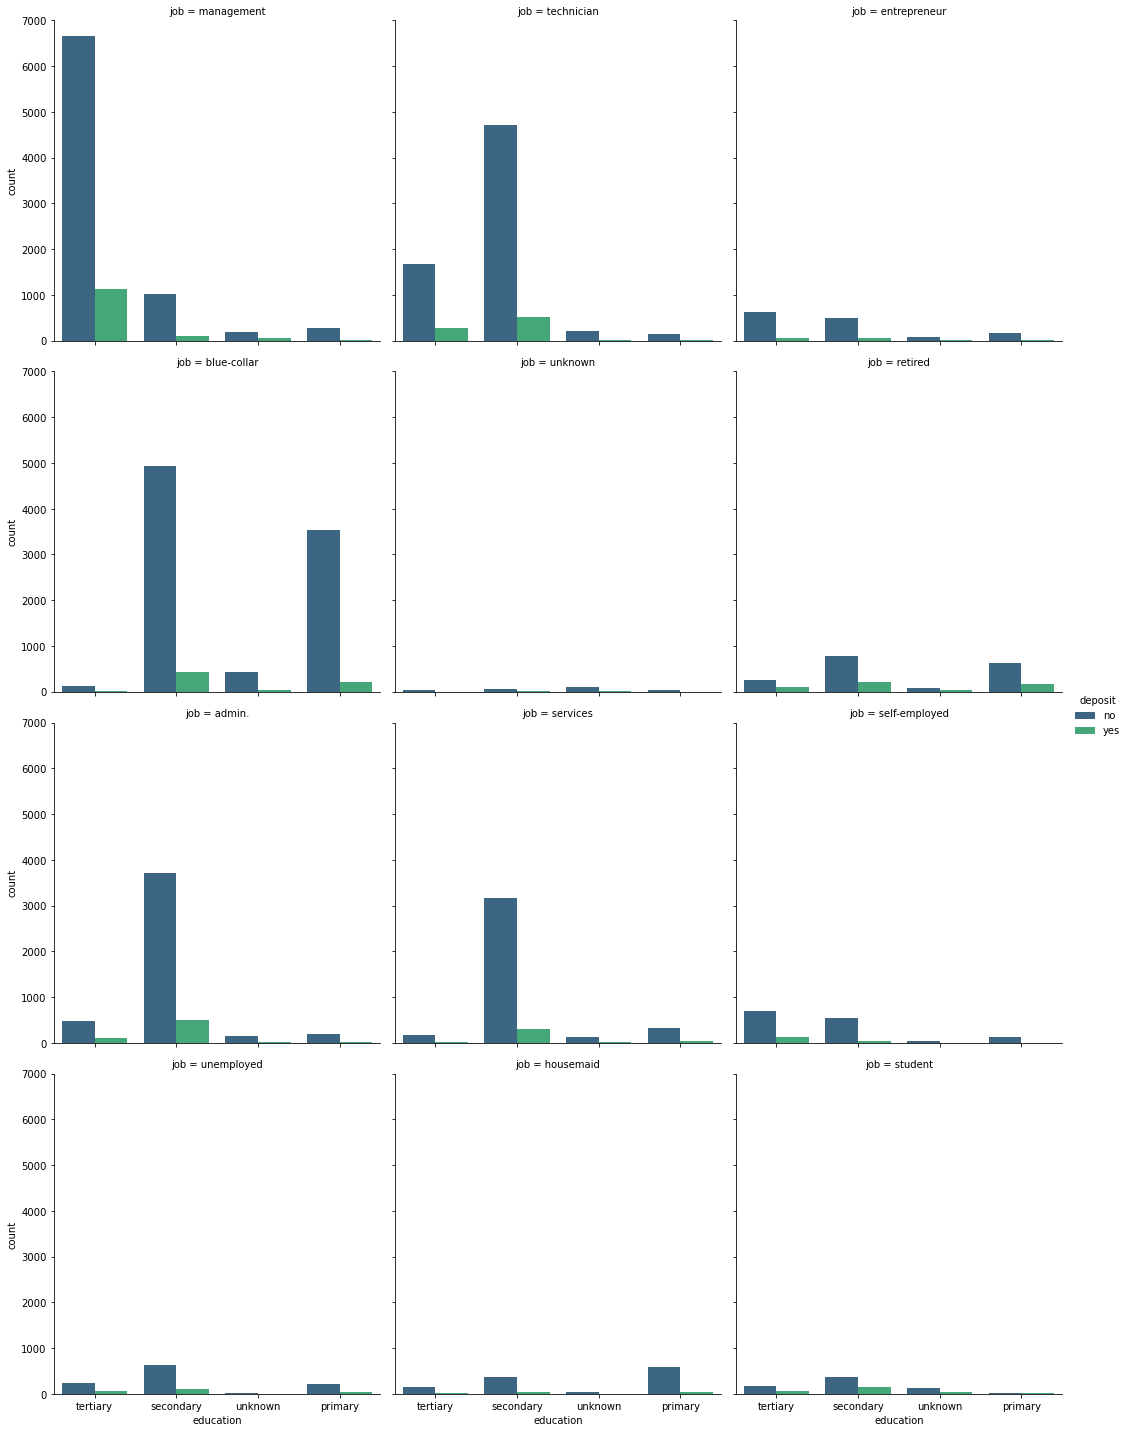

In [20]:
sns.catplot(x='education',hue="deposit", col="job",kind='count',data=df_new, col_wrap=3, palette = 'viridis');

**Insight :**

Berdasarkan grafik diatas dapat dilihat bahwa dari data job untuk management dan pendidikan merupakan tertiary yang lebih banyak menghasilkan grafik yang menunjukkan tidak melakukan deposit.

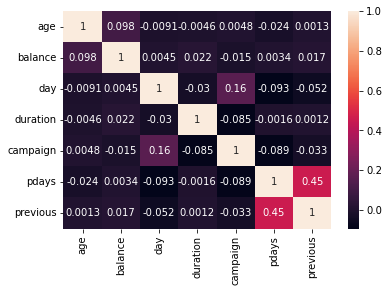

In [21]:
sns.heatmap(df_bank.corr(), annot=True);

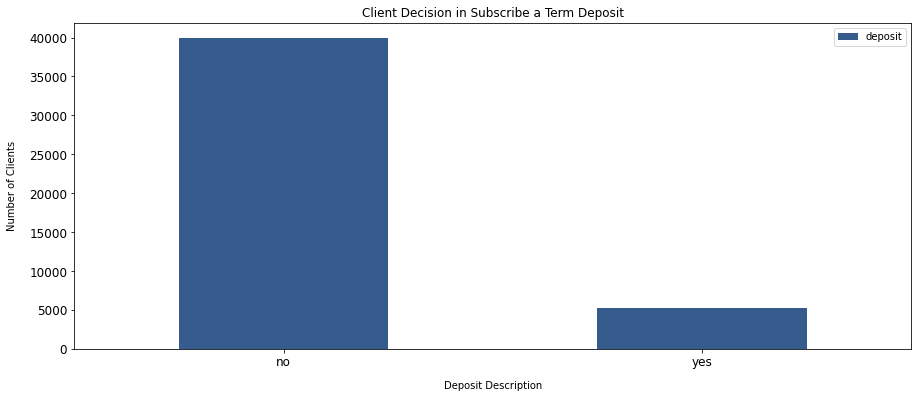

In [22]:
df_new["deposit"].value_counts().plot(kind="bar", figsize=(15,6), color = '#365c8d')

plt.xticks(rotation=0)
plt.tick_params(axis="both", labelsize=12)
plt.title("Client Decision in Subscribe a Term Deposit")
plt.ylabel("Number of Clients", labelpad=12)
plt.xlabel("Deposit Description", labelpad=12)

plt.legend()

plt.show()

In [23]:
df_deposit = df_new['deposit'].value_counts()
df_deposit

no     39922
yes     5289
Name: deposit, dtype: int64

In [24]:
labels=df_new['deposit'].unique()
labels

array(['no', 'yes'], dtype=object)

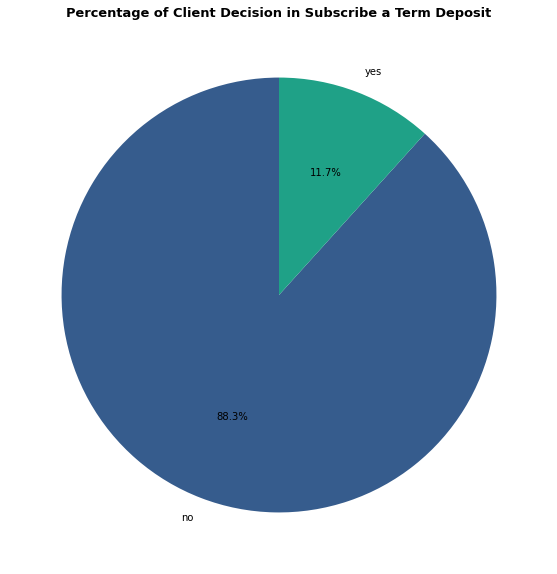

In [25]:
plt.figure(figsize=(10,10))

colors=['#365c8d','#1fa187']
font = {'weight': 'bold','size': 13}
ax = plt.axes()
plt.title('Percentage of Client Decision in Subscribe a Term Deposit', fontdict=font)
ab = plt.pie(df_deposit, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')

plt.show()

**Insight :**

Berdasarkan dari bar chart dan pie chart di atas dapat dilihat bahwa sebanyak 39.922 nasabah atau sekitar 88.3% memilih untuk tidak menggunakan deposito dan hanya 5289 nasabah atau sekitar 11.7% yang memilih menggunakan deposito.

# Classification
## Encoder Data using get_dummies()

In [26]:
df_enc_dum = pd.get_dummies(df_bank, columns=["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"])

# Cek Data
df_enc_dum

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,261,-0.569351,-0.411453,-0.251940,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0.288529,-0.437895,-1.298476,151,-0.569351,-0.411453,-0.251940,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.411453,-0.251940,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0.571051,0.047205,-1.298476,92,-0.569351,-0.411453,-0.251940,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.411453,-0.251940,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,977,0.076230,-0.411453,-0.251940,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45207,2.831227,0.120447,0.143418,456,-0.246560,-0.411453,-0.251940,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45208,2.925401,1.429593,0.143418,1127,0.721811,1.436189,1.050473,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
45209,1.512791,-0.228024,0.143418,508,0.399020,-0.411453,-0.251940,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


Kemudian akan diubah isi data deposit dengan (1 dan 0) agar dapat digunakan selanjutnya untuk data train dan data test.

### Mengganti Data Deposit

In [27]:
df_enc_dum.deposit.replace(("yes", "no"), (1, 0), inplace=True)

df_enc_dum

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,261,-0.569351,-0.411453,-0.251940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0.288529,-0.437895,-1.298476,151,-0.569351,-0.411453,-0.251940,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.411453,-0.251940,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0.571051,0.047205,-1.298476,92,-0.569351,-0.411453,-0.251940,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.411453,-0.251940,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,977,0.076230,-0.411453,-0.251940,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45207,2.831227,0.120447,0.143418,456,-0.246560,-0.411453,-0.251940,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45208,2.925401,1.429593,0.143418,1127,0.721811,1.436189,1.050473,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
45209,1.512791,-0.228024,0.143418,508,0.399020,-0.411453,-0.251940,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


## Memisahkan Feature dan Target
### Feature

In [28]:
df_feature = df_enc_dum.drop("deposit", axis=1)

### Target

In [29]:
df_target = df_enc_dum["deposit"]

## Set Data Training dan Data Testing

In [30]:
data = X_train, X_test, y_train, y_test = train_test_split(
    df_feature,
    df_target,
    test_size=0.3
)

print("Shape Training Feature:", X_train.shape)
print("Shape Testing Feature:", X_test.shape)
print("Shape Training Feature:", y_train.shape)
print("Shape Testing Feature:", y_test.shape)

Shape Training Feature: (31647, 51)
Shape Testing Feature: (13564, 51)
Shape Training Feature: (31647,)
Shape Testing Feature: (13564,)


## Logistic Regression

In [31]:
model = LogisticRegression(solver="liblinear", random_state=0)

In [32]:
model.fit(df_feature, df_target)

LogisticRegression(random_state=0, solver='liblinear')

In [33]:
model = LogisticRegression(solver="liblinear", random_state=0).fit(df_feature, df_target)

In [34]:
model.classes_

array([0, 1], dtype=int64)

In [35]:
print(model.intercept_, model.coef_)

[-0.80923933] [[ 1.23797226e-03  3.88510679e-02  8.07267005e-02  4.18818006e-03
  -2.80930202e-01 -1.42908279e-02  2.23001498e-02  8.32400913e-02
  -2.27401366e-01 -2.73541468e-01 -4.12599651e-01 -7.97427163e-02
   3.37881598e-01 -2.12950179e-01 -1.40445881e-01  4.64378270e-01
  -9.16863276e-02 -9.24699404e-02 -1.63901765e-01 -2.40040591e-01
  -4.21826176e-01 -1.47372567e-01 -4.03673183e-01 -2.24096037e-01
  -2.43906751e-02 -1.57079438e-01 -4.00965432e-01 -4.08273902e-01
  -6.76727067e-02 -7.41566627e-01 -1.91480781e-01 -6.17758553e-01
   3.22137302e-01  1.59153625e-01 -1.29053026e+00 -8.10727059e-02
  -7.73709297e-01  5.34371928e-01 -2.31325373e-01 -1.33013210e+00
  -9.08432904e-01  3.61901518e-01  1.48703544e+00 -4.82065862e-01
  -9.52321783e-01  7.86765194e-01  7.79746604e-01 -7.96339525e-01
  -5.88392285e-01  1.48212724e+00 -9.06634769e-01]]


In [36]:
# Step 4 : Evaluate the Model
model.predict_proba(df_feature)

array([[0.98505011, 0.01494989],
       [0.99018996, 0.00981004],
       [0.99701991, 0.00298009],
       ...,
       [0.02495313, 0.97504687],
       [0.88310138, 0.11689862],
       [0.8715543 , 0.1284457 ]])

In [37]:
model.predict(df_feature)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [38]:
model.score(df_feature, df_target)

print("Hasil Model Score =", round(model.score(df_feature, df_target), 2))

Hasil Model Score = 0.9


In [39]:
confusion_matrix(df_target, model.predict(df_feature))

array([[38941,   981],
       [ 3457,  1832]], dtype=int64)

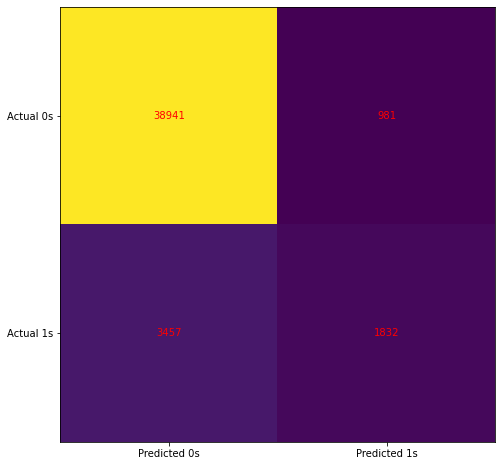

In [40]:
cm = confusion_matrix(df_target, model.predict(df_feature))

fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)

ax.xaxis.set(ticks = (0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks = (0, 1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha = "center", va ="center", color="red")
        
plt.show()

Matriks yang diperoleh diatas menunjukkan hasil yaitu,

- 38941 prediksi true negatif : 38941 data prediksi benar dinyatakan sebagai nol
- 3457 prediksi false negatif: 3457 data prediksi salah dinyatakan sebagai nol.
- 981 prediksi false positif: 981 data prediksi salah dinyatakan sebagai satu.
- 1832 prediksi positif yang benar: 1832 data prediksi benar dinyatakan sebagai satu.

## Logistic Regression - Non Visual

In [58]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

model_lg = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, model_lg))
matrix = confusion_matrix(y_test, model_lg)
print(matrix)

Accuracy: 0.8982601002654085
[[11664   290]
 [ 1090   520]]


## Decision Tree

In [59]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

model_dt = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, model_dt))
matrix1 = confusion_matrix(y_test, model_dt)
print(matrix1)

Accuracy: 0.8756266588027131
[[11117   837]
 [  850   760]]


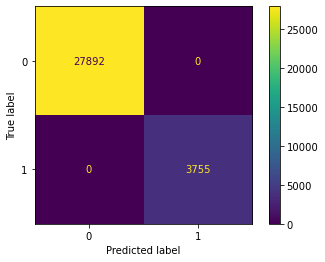

In [43]:
plot_confusion_matrix(dt, X_train, y_train)

Matriks yang diperoleh diatas menunjukkan hasil yaitu,

- 27892 prediksi true negatif : 27892 data prediksi benar dinyatakan sebagai nol
- 0 prediksi false negatif: 0 data prediksi salah dinyatakan sebagai nol.
- 0 prediksi false positif: 0 data prediksi salah dinyatakan sebagai satu.
- 3755 prediksi positif yang benar: 3755 data prediksi benar dinyatakan sebagai satu.

## Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

model_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, model_rf))
matrix2 = confusion_matrix(y_test, model_rf)
print(matrix2)

Accuracy: 0.9048215865526393
[[11630   324]
 [  967   643]]


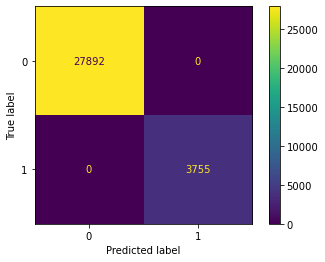

In [45]:
plot_confusion_matrix(rf, X_train, y_train)

Matriks yang diperoleh diatas menunjukkan hasil yaitu,

- 27892 prediksi true negatif : 27892 data prediksi benar dinyatakan sebagai nol
- 0 prediksi false negatif: 0 data prediksi salah dinyatakan sebagai nol.
- 0 prediksi false positif: 0 data prediksi salah dinyatakan sebagai satu.
- 3755 prediksi positif yang benar: 3755 data prediksi benar dinyatakan sebagai satu.

## Support Vector Machine (SVM)

In [46]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.3, random_state=109) 

In [47]:
from sklearn import svm

svm = svm.SVC()
svm.fit(X_train, y_train)

model_svm = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, model_svm))
matrix3 = confusion_matrix(y_test, model_svm)
print(matrix3)

Accuracy: 0.8869065172515482
[[11759   195]
 [ 1339   271]]


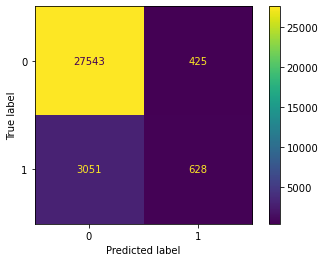

In [48]:
plot_confusion_matrix(svm, X_train, y_train)

Matriks yang diperoleh diatas menunjukkan hasil yaitu,

- 27543 prediksi true negatif : 27543 data prediksi benar dinyatakan sebagai nol
- 3051 prediksi false negatif: 3051 data prediksi salah dinyatakan sebagai nol.
- 425 prediksi false positif: 425 data prediksi salah dinyatakan sebagai satu.
- 628 prediksi positif yang benar: 628 data prediksi benar dinyatakan sebagai satu.

## Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

model_nb = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, model_nb))
matrix4 = confusion_matrix(y_test, model_nb)
print(matrix4)

Accuracy: 0.851150103214391
[[10705  1249]
 [  770   840]]


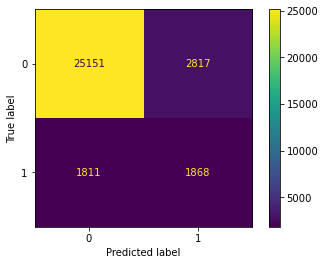

In [50]:
plot_confusion_matrix(nb, X_train, y_train)

Matriks yang diperoleh diatas menunjukkan hasil yaitu,

- 25151 prediksi true negatif : 25151 data prediksi benar dinyatakan sebagai nol
- 1811 prediksi false negatif: 1811 data prediksi salah dinyatakan sebagai nol.
- 2817 prediksi false positif: 2817 data prediksi salah dinyatakan sebagai satu.
- 1868 prediksi positif yang benar: 1868 data prediksi benar dinyatakan sebagai satu.

## K-Nearest Neigbhor (KNN)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(X_train, y_train)

model_knn = kNN.predict(X_test)

print("Accuracy:", accuracy_score(y_test, model_knn))
matrix5 = confusion_matrix(y_test, model_knn)
print(matrix5)

Accuracy: 0.8823355942199941
[[11543   411]
 [ 1185   425]]


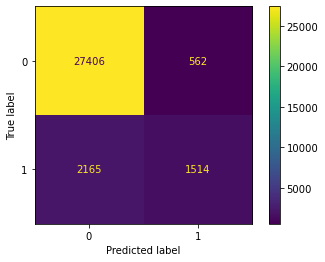

In [52]:
plot_confusion_matrix(kNN, X_train, y_train)

Matriks yang diperoleh diatas menunjukkan hasil yaitu,

- 27406 prediksi true negatif : 27406 data prediksi benar dinyatakan sebagai nol
- 2165 prediksi false negatif: 2165 data prediksi salah dinyatakan sebagai nol.
- 562 prediksi false positif: 562 data prediksi salah dinyatakan sebagai satu.
- 1514 prediksi positif yang benar: 1514 data prediksi benar dinyatakan sebagai satu.

In [53]:
error = []

In [54]:
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

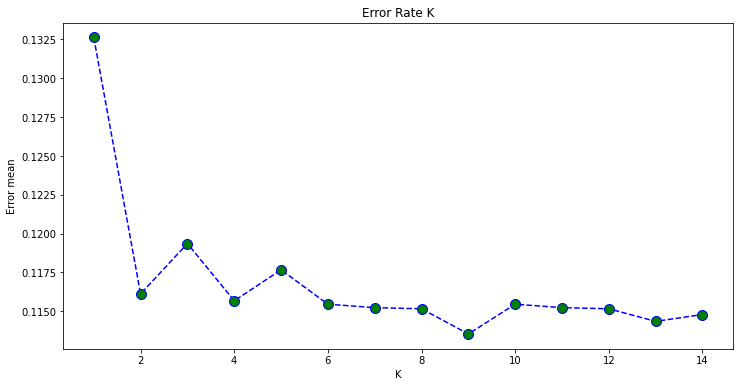

In [55]:
plt.figure(figsize=(12,6))
plt.plot(range(1,15), error, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

**Insight :**

The lowest error rate is at below 0.1150 at K = 9.

# Overall Accuracy

In [61]:
print("Logistic Regression:", round(accuracy_score(y_test, model_lg), 3))
print("Decision Tree:", round(accuracy_score(y_test, model_dt), 3))
print("Random Forest:", round(accuracy_score(y_test, model_rf), 3))
print("SVM:", round(accuracy_score(y_test, model_svm), 3))
print("Naive Bayes:", round(accuracy_score(y_test, model_nb), 3))
print("KNN:", round(accuracy_score(y_test, model_knn), 3))

Logistic Regression: 0.898
Decision Tree: 0.876
Random Forest: 0.905
SVM: 0.887
Naive Bayes: 0.851
KNN: 0.882


Dari hasil analisis yang dilakukan, diketahui bahwa model **Random Forest** memiliki tingkat akurasi tertinggi dibandingkan model lain. Sehingga model Random Forest tepat digunakan dalam memprediksi apakah client dari sebuah institusi bank di Portugal akan mengajukan bank term deposit atau tidak. Dapat dilihat pada tabel bahwa Random Forest memiliki nilai accuracy tertinggi yaitu 0.905 atau 90.5%.